In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import wrangle

# Acquire

In [2]:
df = pd.read_csv('service_calls.csv')

In [3]:
df.shape

(495440, 17)

# Prepare

In [4]:
df = wrangle.clean_311(df)
df.head()

/Users/caitlyncarney/codeup-data-science/project/workbooks/caitlyn/2nd_iteration/wrangle.py:331: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['open_week'] = df.open_date.dt.week


open_date   due_date closed_date is_late                       dept  \
0 2012-08-15 2012-08-30         NaT     YES  Code Enforcement Services   
1 2013-06-06 2013-08-09         NaT     YES  Code Enforcement Services   
2 2013-07-19 2013-09-23         NaT     YES  Code Enforcement Services   
3 2013-09-16 2013-09-30         NaT     YES  Code Enforcement Services   
4 2013-09-16 2013-09-30         NaT     YES  Code Enforcement Services   

  call_reason                          case_type case_status  \
0     cleanup           Graffiti Public Property        Open   
1        code              Alley-Way Maintenance        Open   
2        code   Junk Vehicle On Private Property        Open   
3        code  Right Of Way/Sidewalk Obstruction        Open   
4        code  Right Of Way/Sidewalk Obstruction        Open   

                    source_id                                 address  ...  \
0                  Web Portal   600  NOGALITOS ST, San Antonio, 78204  ...   
1                  Web Portal  6043  CASTLE QUEEN, San Antonio, 78218  ...   
2                  Web Portal        842  KIRK PL, San Antonio, 78226  ...   
3  Internal Services Requests   54  KENROCK RIDGE, San Antonio, 78254  ...   
4  Internal Services Requests   74  KENROCK RIDGE, San Antonio, 78254  ...   

   district_9  district_10  voter_turnout_2019  num_of_registered_voters  \
0           0            0               0.085                     61418   
1           0            0               0.086                     67656   
2           0            0               0.085                     61418   
3           0            0               0.154                     83287   
4           0            0               0.154                     83287   

   zipcode  open_month  open_year open_week  per_capita_income  square_miles  
0    78204           8       2012        33              13836         22.24  
1    78218           6       2013        23              19055         59.81  
2    78226           7       2013        29              13836         22.24  
3    78254           9       2013        38              25263         32.82  
4    78254           9       2013        38              25263         32.82  

[5 rows x 36 columns]

In [5]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df, stratify_by= None)

___

# Start Exploring

___

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay (Target)
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Council District

<AxesSubplot:xlabel='council_district', ylabel='count'>

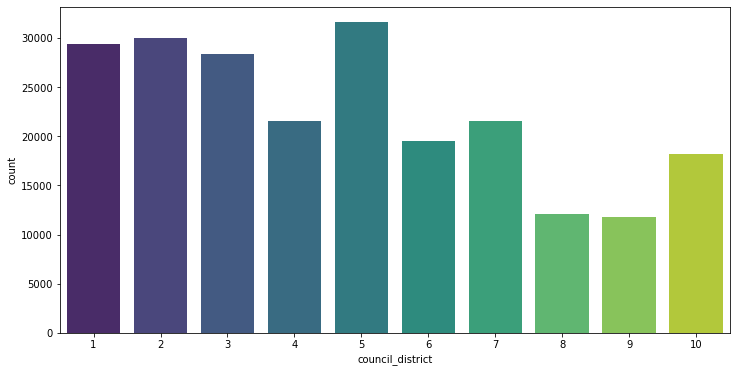

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.council_district, palette='viridis')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- 4, 6, 7, & 10 still have many reports but not as much as 1, 2, 3, and 5
- Districts 8 and 9 have significantly lower amount of cases compared to other districts

___

#### Days Open

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


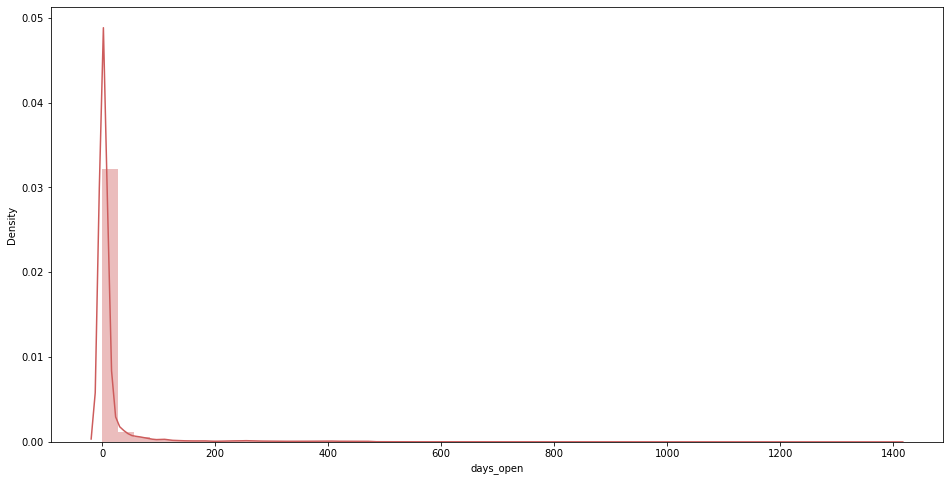

In [7]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_open, color='indianred')
plt.show()

### Takeaways:
- definatly skewed right
- was worse before removing outliers over 1400 days
- not willing to remove any more for the ingrity of the data frame

___

#### Days Until Resolution is Due

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


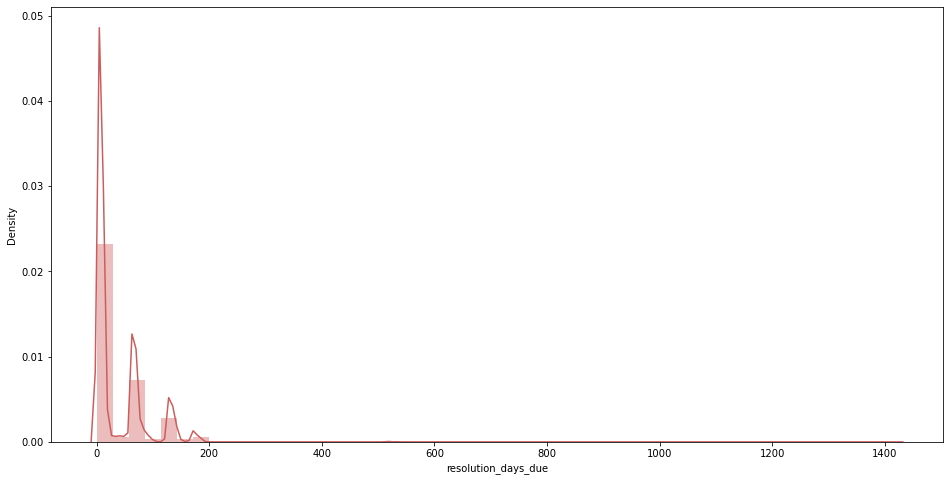

In [8]:
plt.figure(figsize=(16,8))
sns.distplot(df.resolution_days_due, color='indianred')
plt.show()

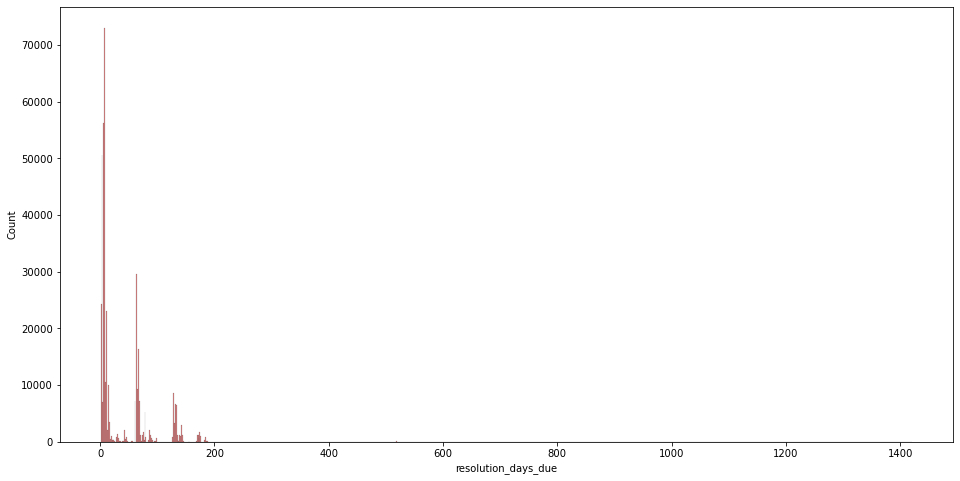

In [9]:
plt.figure(figsize=(16,8))
sns.histplot(df.resolution_days_due, color='indianred')
plt.show()

### Takeaways:
- Skewed right
- Can see a few different spikes but cant see where these are
    - all spikes are between 0 and 200 days open

___

#### Days Before or After Due Date the Resolution was Made

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


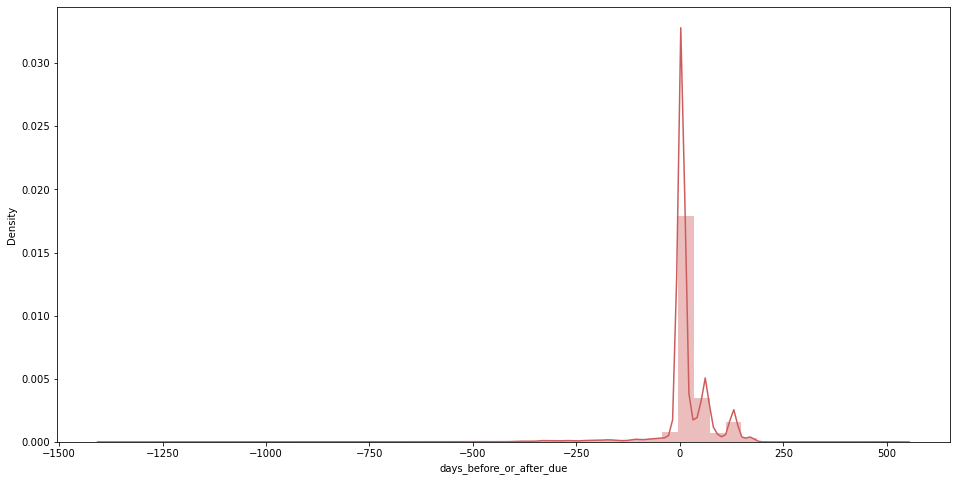

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_before_or_after_due, color='indianred')
plt.show()

### Takeaways:
- There are more spikes in the casescompleted before due
- The later after the due date the more it trails off

___

## Bivariate

# Number of days oven on average in each council district

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

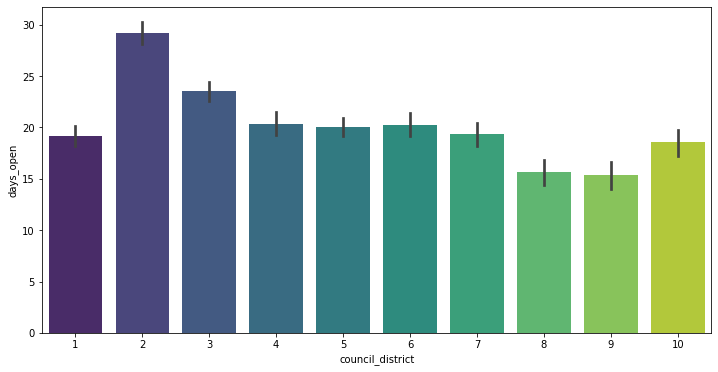

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x=train.council_district, y='days_open', palette='viridis')

### Takeaways:
- District 2 tends to have the most amount of number of days open on average
- Districts 8 and 9 have the least.

___

### Council District and Level of Delay

<AxesSubplot:title={'center':'Delay Levels Accross Districts'}, xlabel='level_of_delay', ylabel='count'>

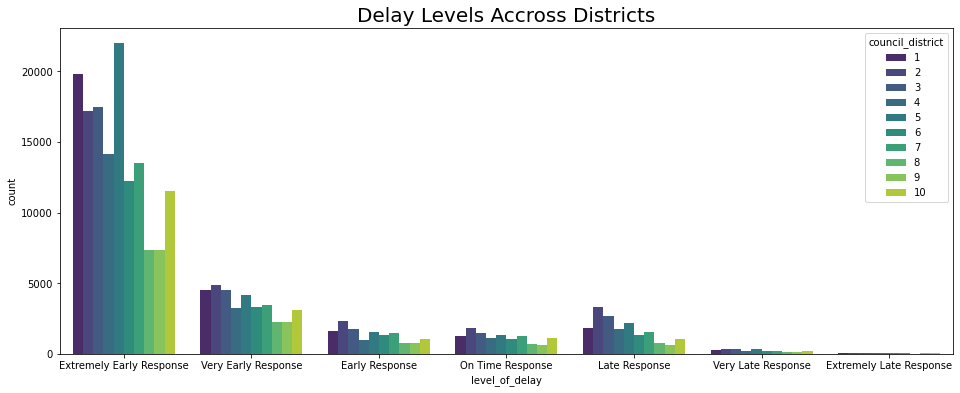

In [12]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Districts", size=20, color='black')
sns.countplot(x='level_of_delay', hue='council_district', data=train,
               palette='viridis')

### Takeaways:
- We can see a downward trand for ach district as the level of delay gets later and later
- There is a spike in late responses for each district, but not a huge one.
- Extremely early responses are far more common than any other level of delay

___

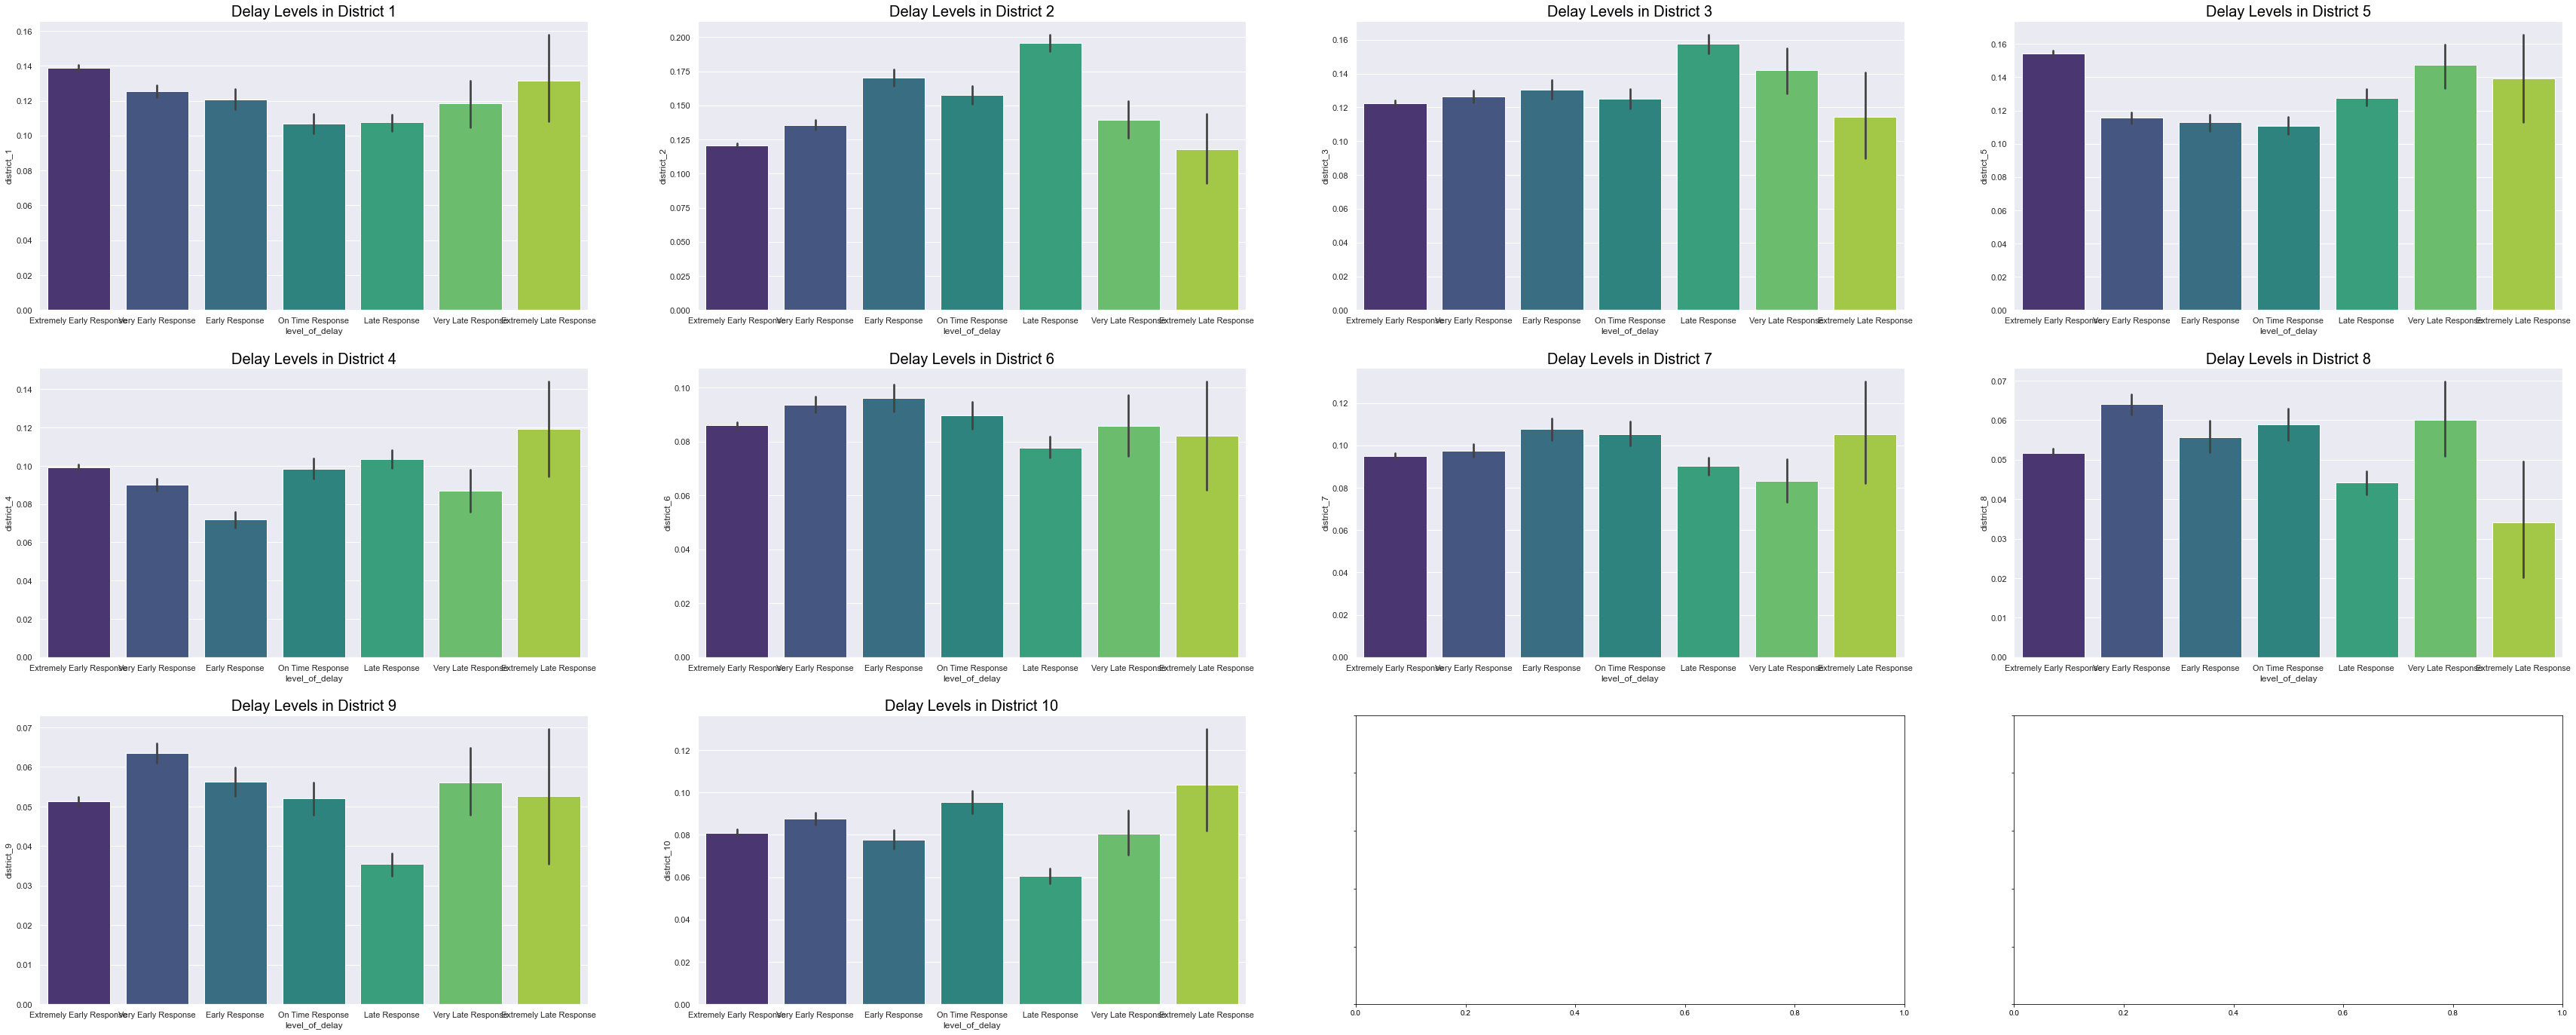

In [13]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,4,1)
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_1', data=train,
               palette='viridis')

plt.subplot(3,4,2)
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_2', data=train,
               palette='viridis')

plt.subplot(3,4,3)
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_3', data=train,
               palette='viridis')

plt.subplot(3,4,5)
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_4', data=train,
               palette='viridis')

plt.subplot(3,4,4)
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_5', data=train,
               palette='viridis')

plt.subplot(3,4,6)
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_6', data=train,
               palette='viridis')

plt.subplot(3,4,7)
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_7', data=train,
               palette='viridis')

plt.subplot(3,4,8)
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_8', data=train,
               palette='viridis')

plt.subplot(3,4,9)
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_9', data=train,
               palette='viridis')

plt.subplot(3,4,10)
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_10', data=train,
               palette='viridis')

plt.show()

### Takeaways:
- District 1
    - Makes up for ~ 13.7% of all extremely late responses
    - Makes up for ~ 14% of all extremely early responses
        - North of downtown
        - north downtown
- District 2
    - makes up for nearly 19.7% of all late responses
- District 3
    - this is the south east side of san antonio
- District 4
    - this is the south west side of san antonio
- District 5
    - Made up of:
        - West of downtown SA
        - South downtown area
- District 6
    - This is the west side of San antonio
- District 7
    - 
- District 8
    - Castle hills, Anaqua Springs Ranch, dominion, and Bently Manor are located in this district
        - Luxury neighborhoods
- District 9
    - location of hill country villiage
        - Luxury neighborhood
- District 10
    - the north west side of SA

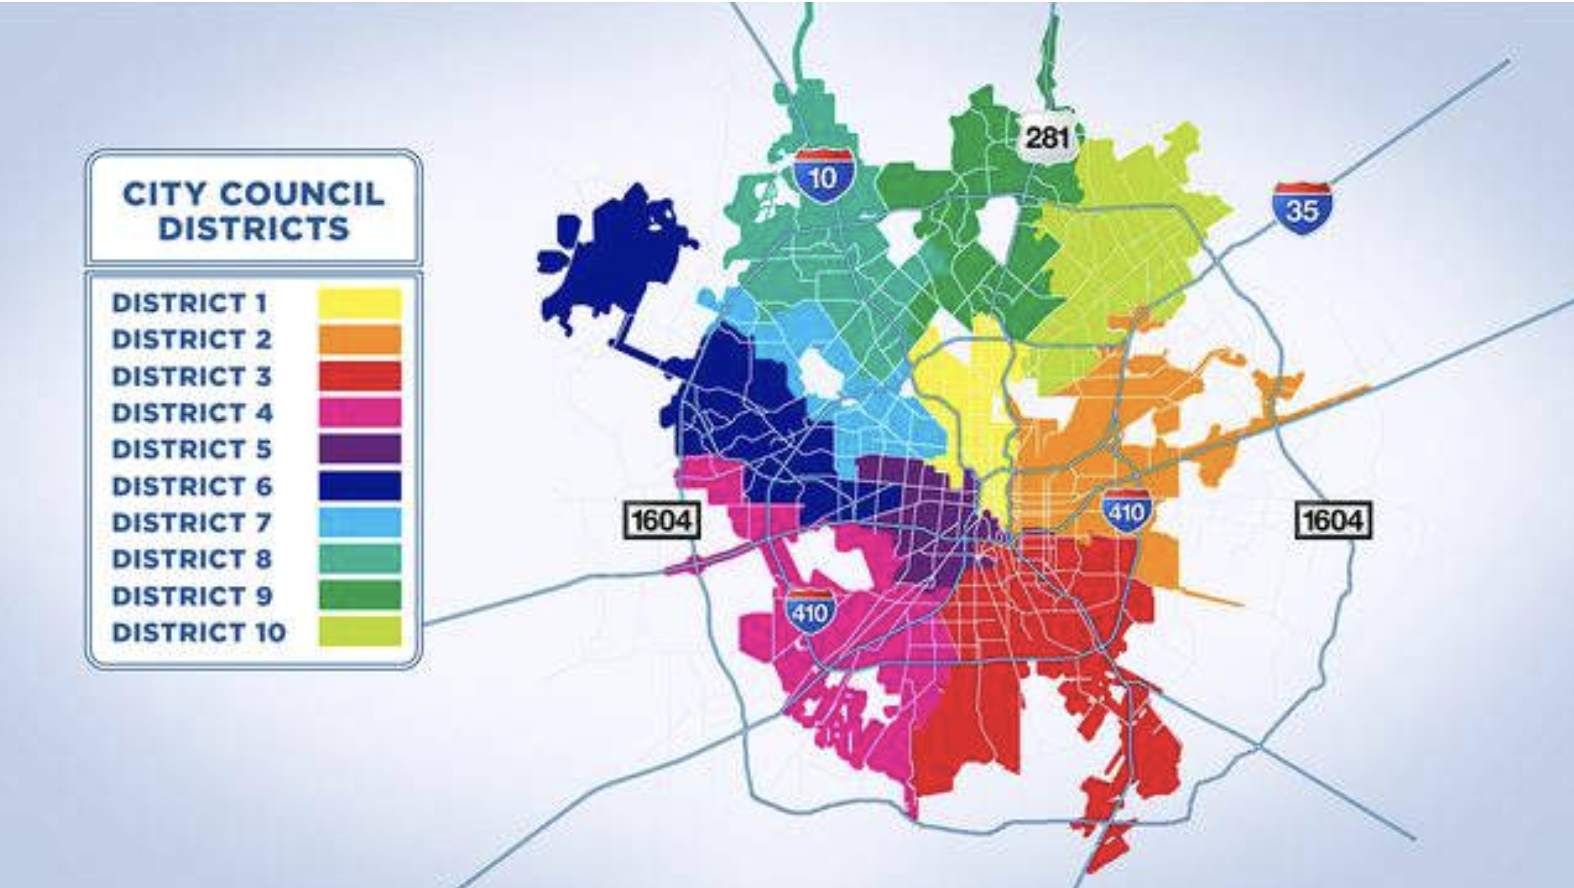

___

## Is the average number of calls in an area affect the response time?

In [14]:
def create_district_train(train):
    '''
    This function takes in the original dataframe and returns
    a dataframe with the quantitative variables averaged by district
    for easier exploration
    '''
    # Creating a dataframe with zipcode and a "days_open" averaged column
    district_train = pd.DataFrame(df.groupby('council_district').days_open.mean()).reset_index()
    # Adding a "days_before_or_after_due" averaged column
    district_train['days_before_or_after_due_mean'] = pd.DataFrame(df.groupby('council_district').days_before_or_after_due.mean()).reset_index()['days_before_or_after_due']
    # Adding a "resolution_days_due" averaged column
    district_train['resolution_days_due_mean'] = pd.DataFrame(df.groupby('council_district').resolution_days_due.mean()).reset_index()['resolution_days_due']
    # Adding a "days_open" median column
    district_train['days_open_med'] = pd.DataFrame(df.groupby('council_district').days_open.median()).reset_index()['days_open']
    # Adding a "days_before_or_after_due" median column
    district_train['days_before_or_after_due_med'] = pd.DataFrame(df.groupby('council_district').days_before_or_after_due.median()).reset_index()['days_before_or_after_due']
    # Adding a "resolution_days_due" median column
    district_train['resolution_days_due_med'] = pd.DataFrame(df.groupby('council_district').resolution_days_due.median()).reset_index()['resolution_days_due']
    return district_train

In [15]:
district_train = create_district_train(train)
district_train

council_district  days_open  days_before_or_after_due_mean  \
0                 1  19.143717                      15.894930   
1                 2  29.047716                       2.149398   
2                 3  23.710392                       6.154547   
3                 4  20.730288                       3.425029   
4                 5  19.994521                      12.404528   
5                 6  20.197030                       5.990039   
6                 7  18.969129                       9.747321   
7                 8  15.937374                      11.436199   
8                 9  15.603973                       6.312798   
9                10  18.841570                       7.428804   

   resolution_days_due_mean  days_open_med  days_before_or_after_due_med  \
0                 41.456287            1.0                           5.0   
1                 40.276166            2.0                           4.0   
2                 36.274592            1.0                           4.0   
3                 30.217723            1.0                           4.0   
4                 38.616305            1.0                           5.0   
5                 32.798878            1.0                           5.0   
6                 34.356436            1.0                           5.0   
7                 31.536661            2.0                           5.0   
8                 27.127589            1.0                           4.0   
9                 31.754346            1.0                           5.0   

   resolution_days_due_med  
0                       11  
1                       10  
2                        8  
3                        8  
4                        9  
5                        9  
6                        9  
7                        8  
8                        8  
9                        8

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due_mean'>

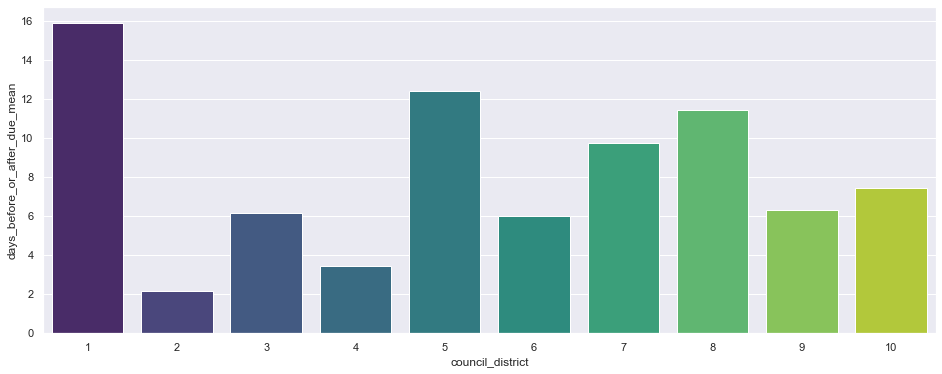

In [52]:
plt.figure(figsize=(16,6))
sns.barplot(data = district_train, x = 'council_district', y = 'days_before_or_after_due_mean', palette = "viridis")

## Takeaways:
- It seems as though council district 2 on average has the slowest 3-1-1 call response time
- While Distrcit 1 has the fastest averge response time
- Districts 0, 7, and 8 have around the same average ranging between 12.5 nd 15.0 days

## Days open and resolution days 

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

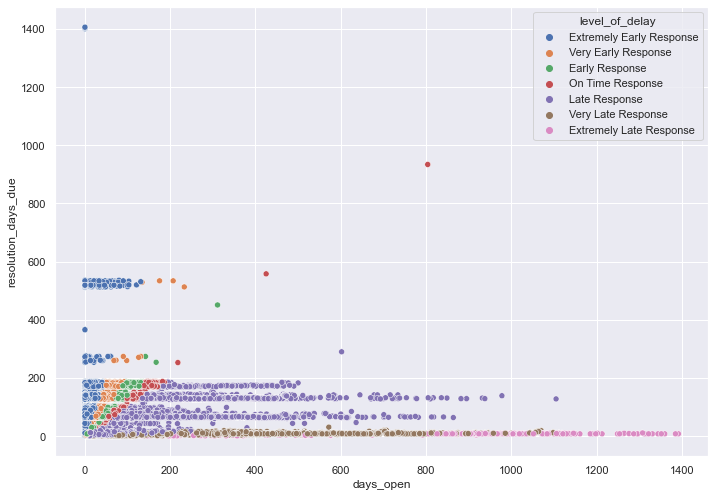

In [17]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', hue='level_of_delay')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

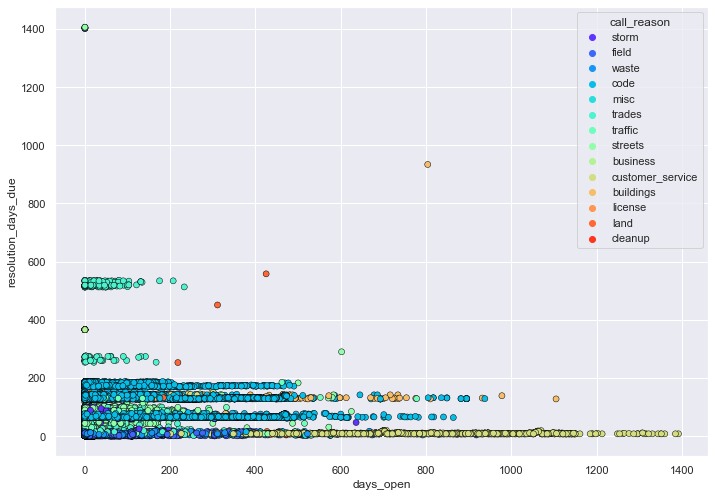

In [18]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='call_reason')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

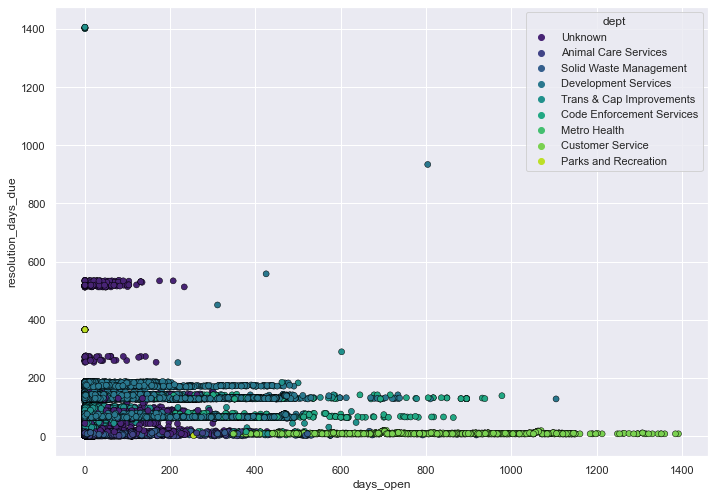

In [19]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='viridis', edgecolor='black',
                hue='dept')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

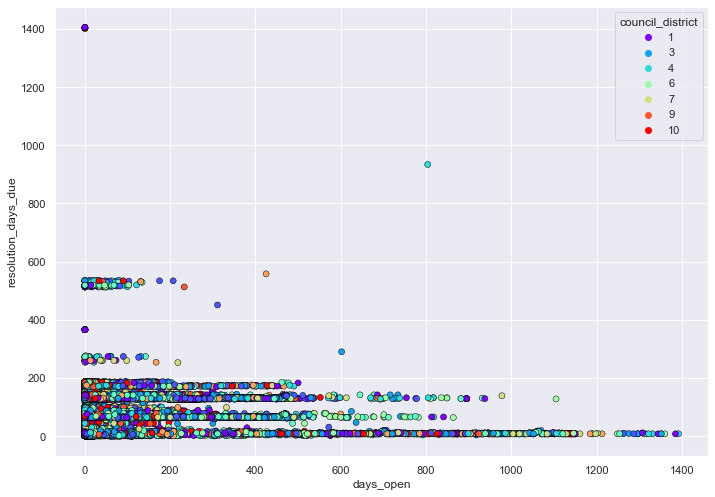

In [20]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='council_district')

## Takeaways:
- most early responses are calls about trades in unknown departments.

___

## How does the form of reporting affect delay level?

In [21]:
df.source_id.value_counts()

Web Portal                    311634
311 Mobile App                 50597
Constituent Call               34468
Internal Services Requests      3287
Name: source_id, dtype: int64

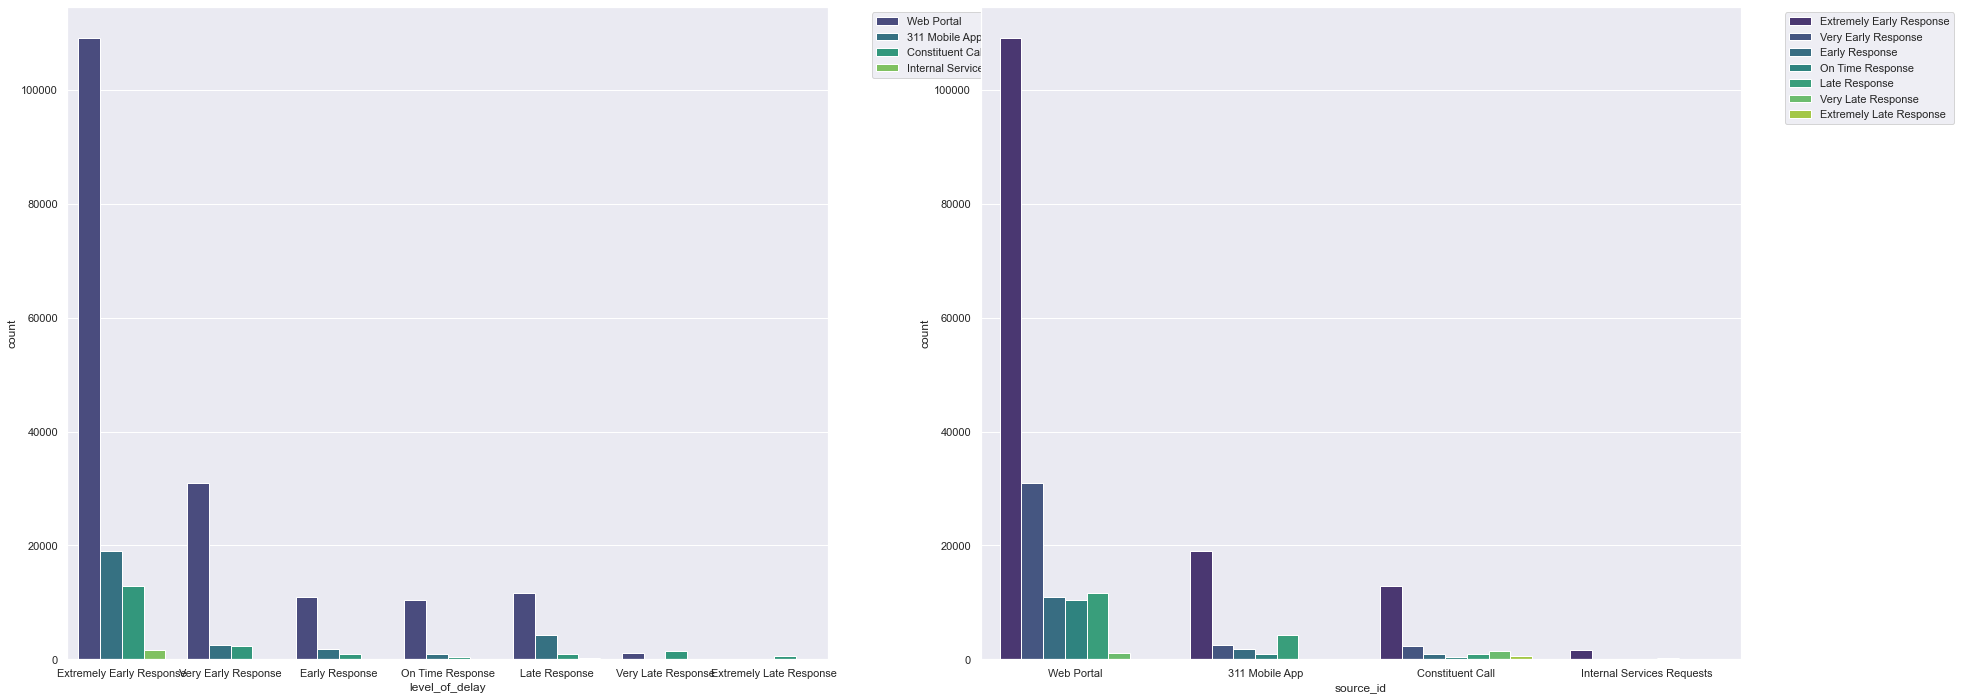

In [22]:
plt.subplots(1, 2, figsize=(30,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
sns.countplot(data=train, hue='source_id', x='level_of_delay', palette = "viridis")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(1,2,2)
sns.countplot(data=train, x='source_id', hue='level_of_delay', palette = "viridis")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Text(0.5, 1.0, 'Delay level vs. resolution days due')

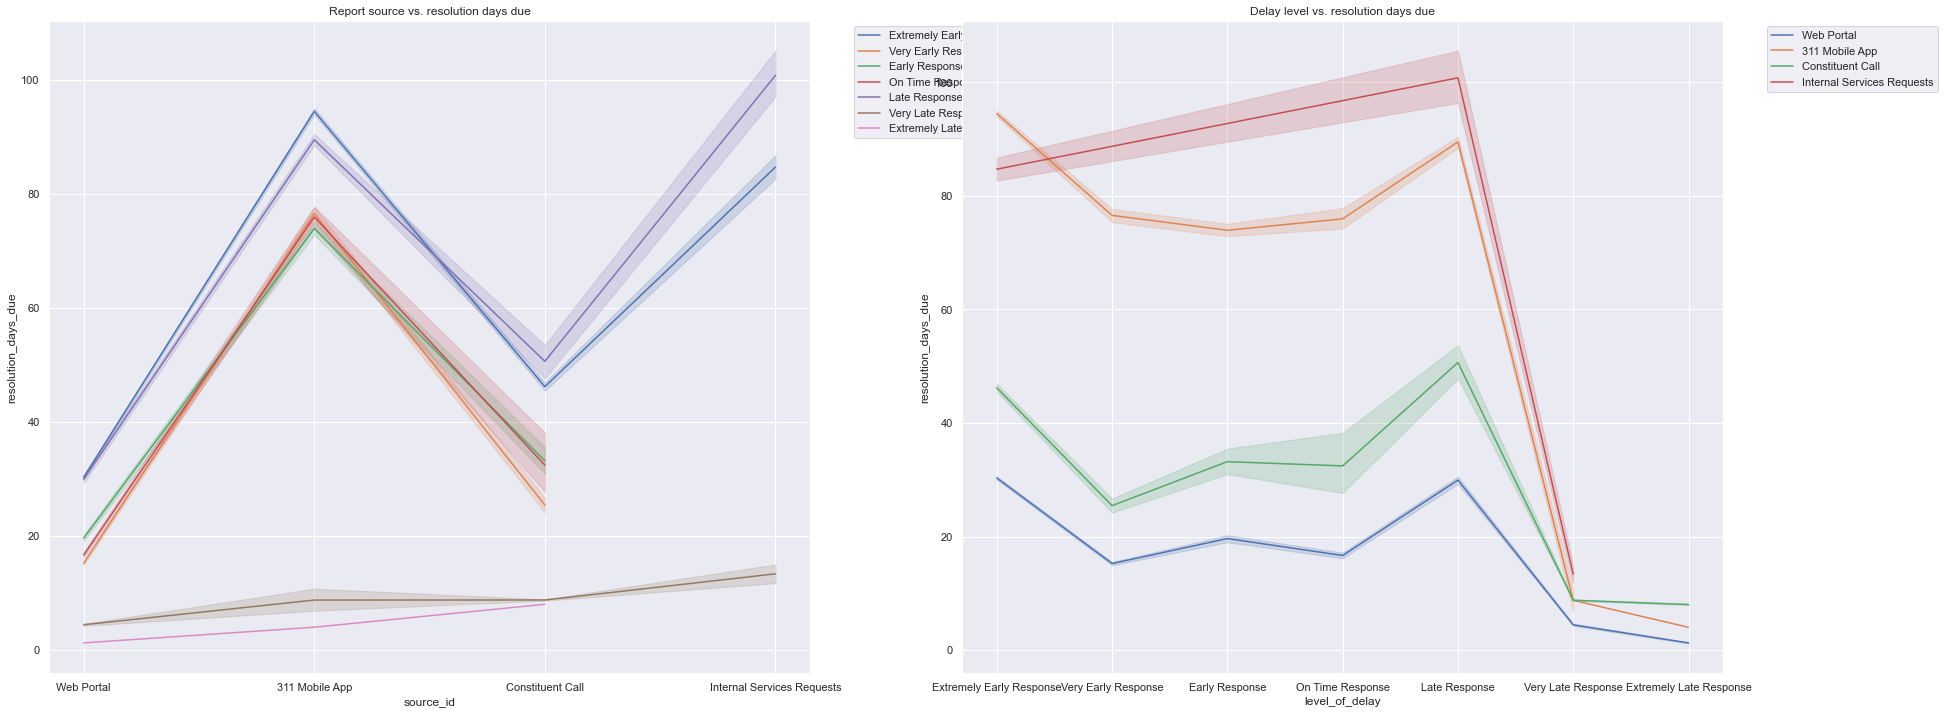

In [23]:
plt.subplots(1, 2, figsize=(30,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
sns.lineplot(data=train, x="source_id", y="resolution_days_due", hue='level_of_delay')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Report source vs. resolution days due")

plt.subplot(1,2,2)
sns.lineplot(data=train, x="level_of_delay", y="resolution_days_due", hue='source_id')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. resolution days due")

## Takeaways:
- There seem to be a spike for Web Portal report from very early to early response times.

Text(0.5, 1.0, 'Delay level vs. resolution days due')

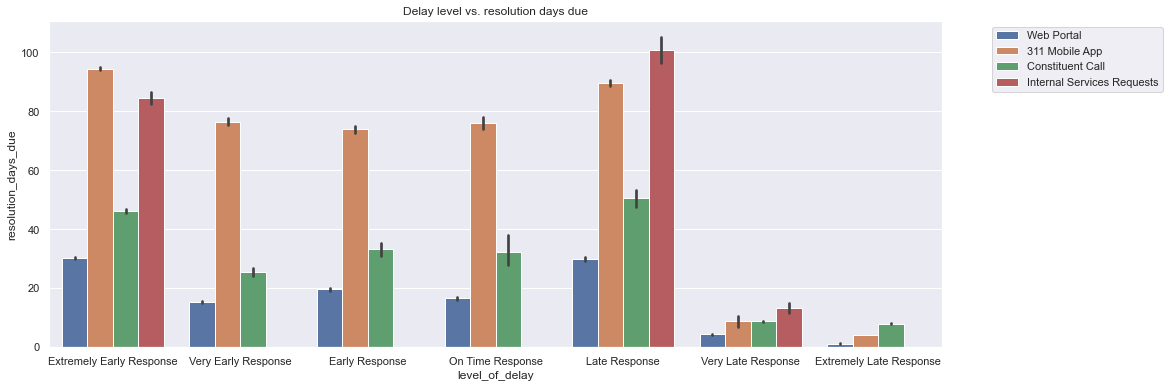

In [24]:
plt.figure(figsize=(16,6))
sns.barplot(data=train, x="level_of_delay", y="resolution_days_due", hue='source_id')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. resolution days due")

## Takeaways:
- The ONLY reporting system in the Extremely early delay level is Web Portal
    - Although it does hold the higheest number of reports, I am left wondering why there are no cases from mobil ape, call, and internal resquest are being completed extremeley early.

Text(0.5, 1.0, 'Delay level vs. days open')

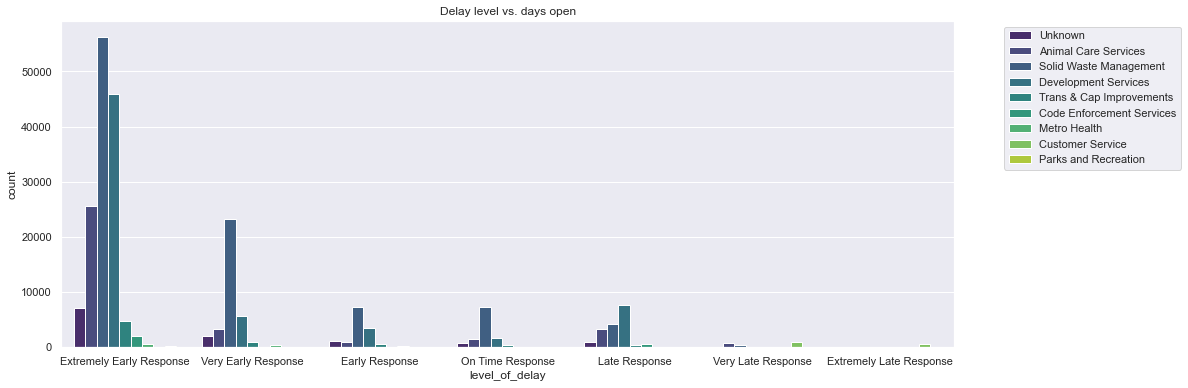

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(data=train, x="level_of_delay", hue='dept', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. days open")

## Takeaways:
- 

# What depatments are being asigned most calls in each district?

<AxesSubplot:title={'center':'Delay Levels in District 1'}, xlabel='dept', ylabel='district_1'>

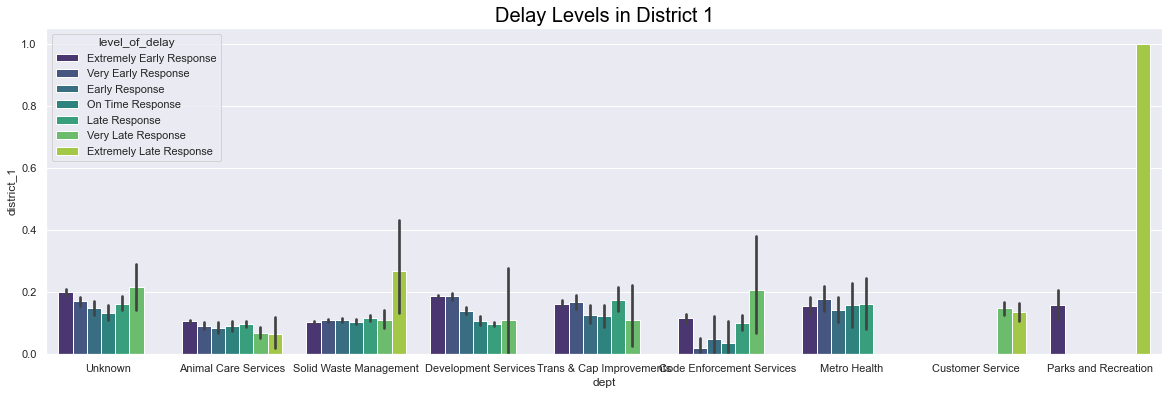

In [26]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_1', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 1 makes up for 100% of the Park's and Recreation department calls
    - all of which are late response times

<AxesSubplot:title={'center':'Delay Levels in District 2'}, xlabel='dept', ylabel='district_2'>

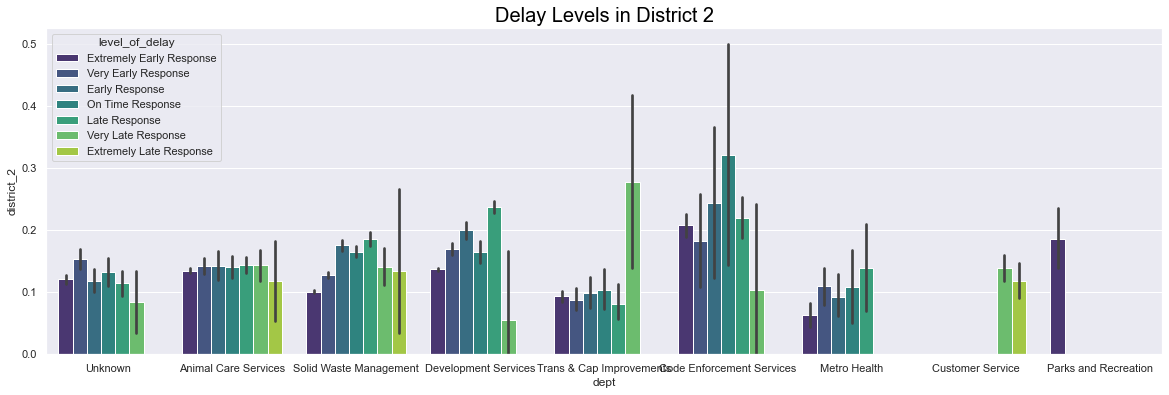

In [27]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_2', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Most of district 2's calls are handed off to code enforcement, and development
- District 2 is usually fairly distributed in delay levels
    - except tans & Cap imporivemnets has a spike in the late and so does customer care (suprising I know)

<AxesSubplot:title={'center':'Delay Levels in District 3'}, xlabel='dept', ylabel='district_3'>

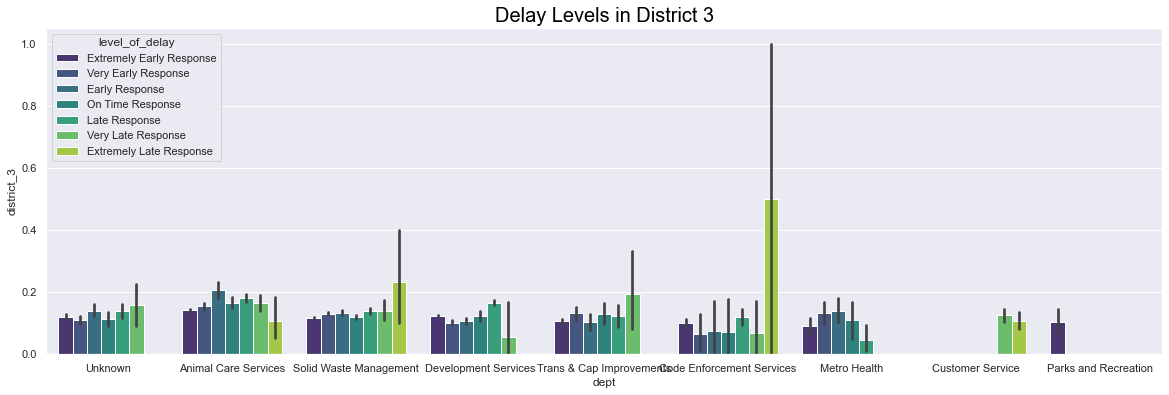

In [28]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_3', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Trans And Cap dept is also slacking in district 3
    - Makes up for ~ 29% of all of this departments extremely late responses

<AxesSubplot:title={'center':'Delay Levels in District 4'}, xlabel='dept', ylabel='district_4'>

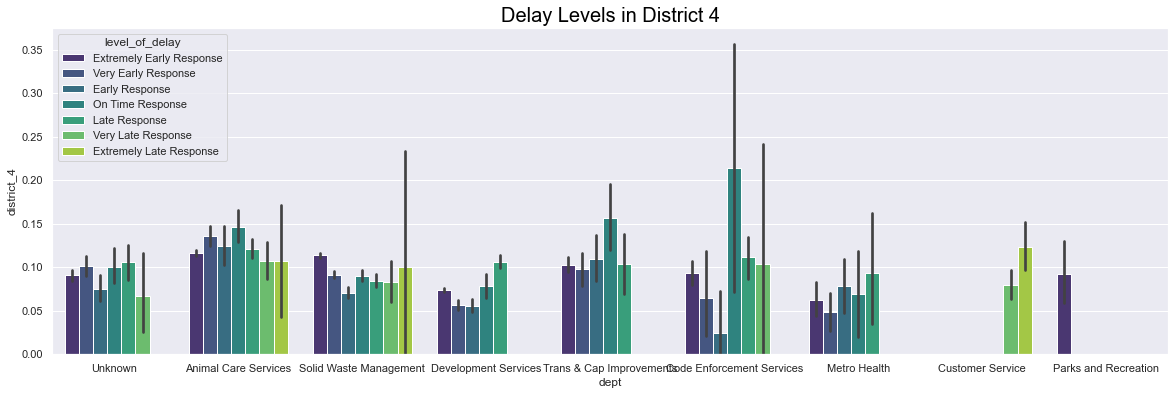

In [29]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_4', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 4's Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses

<AxesSubplot:title={'center':'Delay Levels in District 5'}, xlabel='dept', ylabel='district_5'>

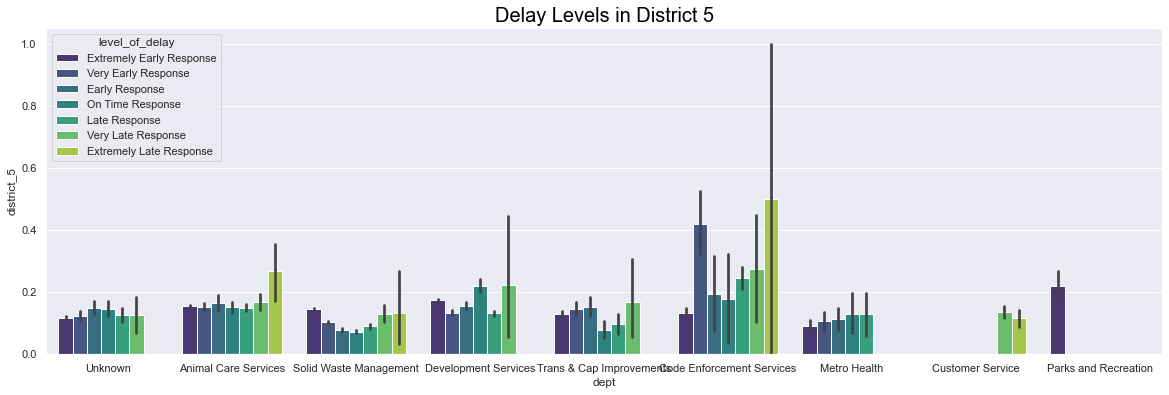

In [30]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_5', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Code Enforcement department be working overtime
    - everything in this department is pretty high with the exceotio of on time responses, adnd extrememly early responses.

<AxesSubplot:title={'center':'Delay Levels in District 6'}, xlabel='dept', ylabel='district_6'>

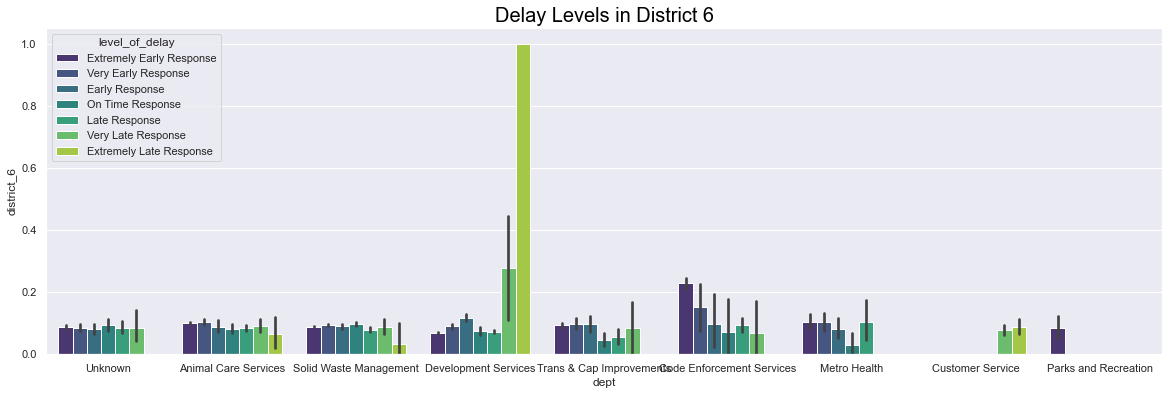

In [31]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_6', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Developmental services have 100% of their extremely late repsonses come from district 6
- About 28% of the developmental sservices departments very late responses are in distric 6

<AxesSubplot:title={'center':'Delay Levels in District 7'}, xlabel='dept', ylabel='district_7'>

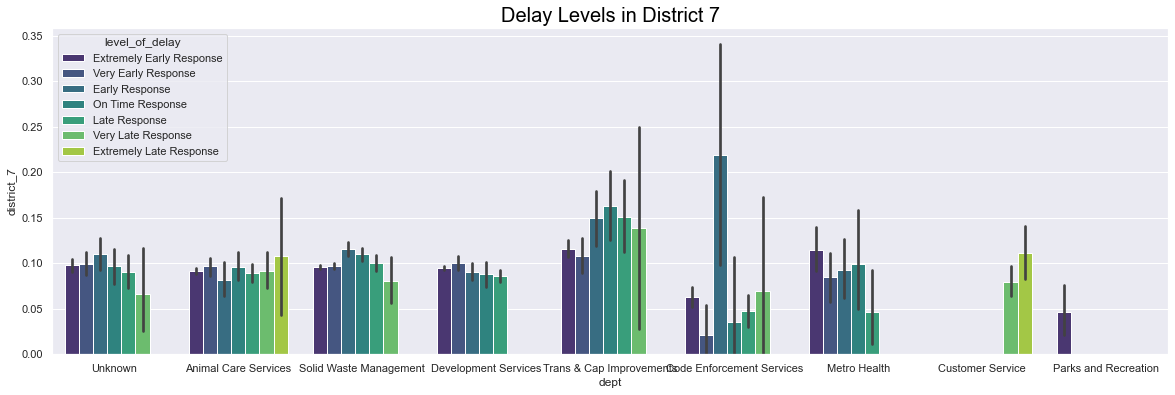

In [32]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_7', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 7 tend to be responded to later rather than earlier accross all departments except solid waste, and metro health

<AxesSubplot:title={'center':'Delay Levels in District 8'}, xlabel='dept', ylabel='district_8'>

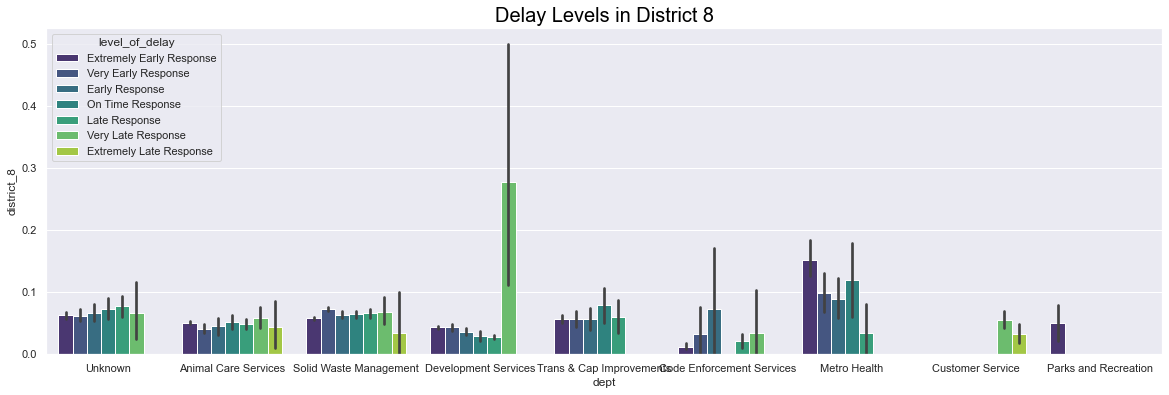

In [33]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_8', hue='level_of_delay', data=train,
               palette='viridis')

<AxesSubplot:title={'center':'Delay Levels in District 9'}, xlabel='dept', ylabel='district_9'>

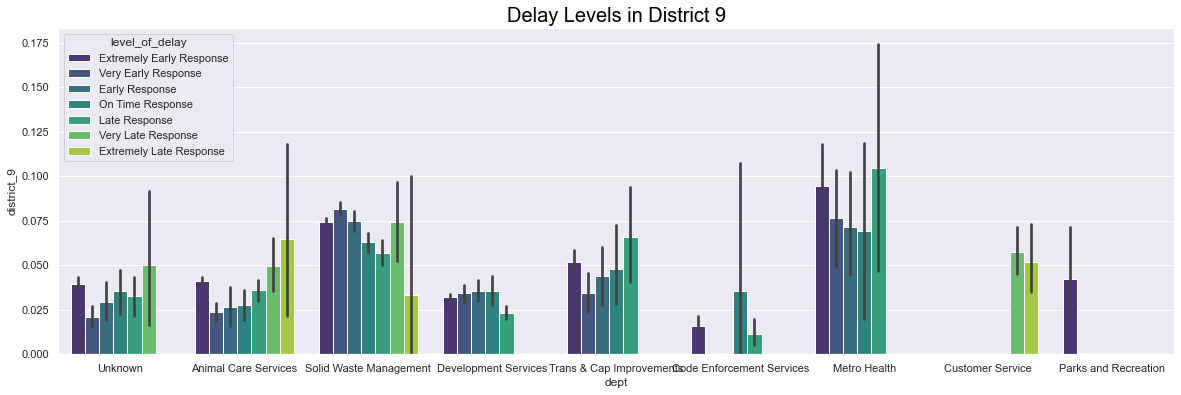

In [34]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_9', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 9 has a spike in their extremely late repsonses from the Development services

<AxesSubplot:title={'center':'Delay Levels in District 10'}, xlabel='dept', ylabel='district_10'>

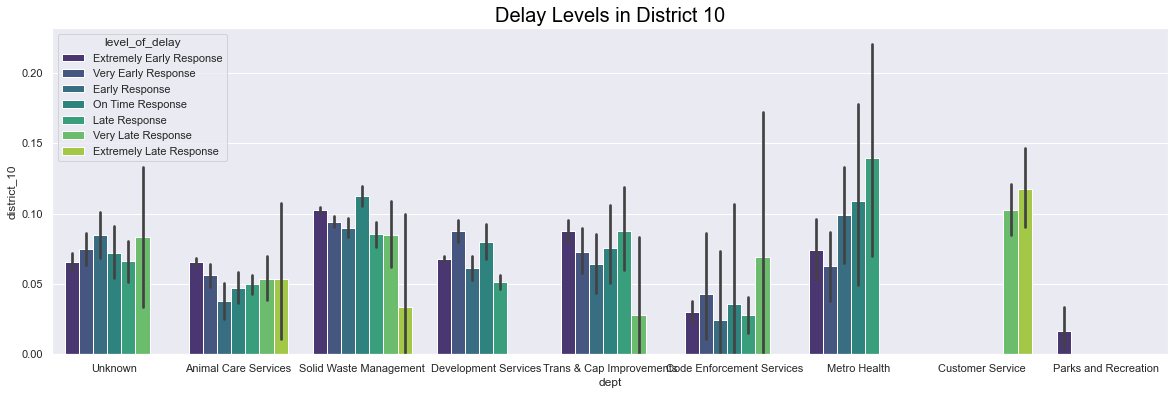

In [35]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_10', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways from all department district delays:
- More calls about waste, development, and animal services in district 0
    - but overall hardly any calls are happening in this district.
- District 1 makes up for 100% of the Park's and Recreation department calls
    - all of which are late response times
- Most of district 2's calls are handed off to code enforcement, and development
- District 2 is usually fairly distributed in delay levels
    - except tans & Cap imporivemnets has a spike in the late and so does customer care (suprising I know)
- Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Trans And Cap dept is also slacking in district 3
    - Makes up for ~ 29% of all of this departments extremely late responses
- District 4's Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Code Enforcement department be working  in District 5
    - everything in this department is pretty high with the exceotio of on time responses, adnd extrememly early responses.
- Code enforcement is high on both extremes in distrcit 6
- District 7 tend to be responded to later rather than earlier accross all departments except solid waste, and metro health
- District 9 has a spike in their extremely late repsonses from the Development services

<AxesSubplot:title={'center':'Department Delays in District 0'}, xlabel='dept', ylabel='count'>

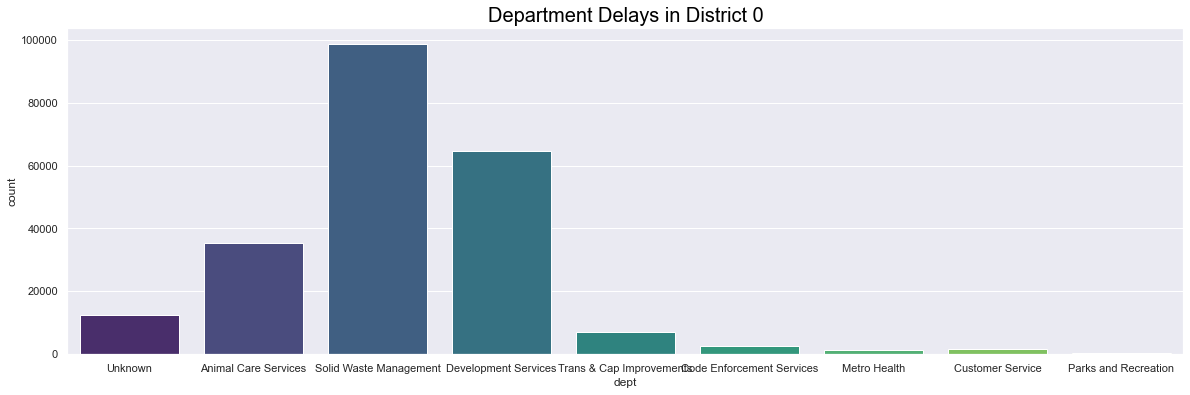

In [36]:
plt.figure(figsize=(20,6))
plt.title("Department Delays in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='dept', data=train,
               palette='viridis')

# Call Reason Delays per District

<AxesSubplot:title={'center':'Call Reason Delays in District 1'}, xlabel='call_reason', ylabel='district_1'>

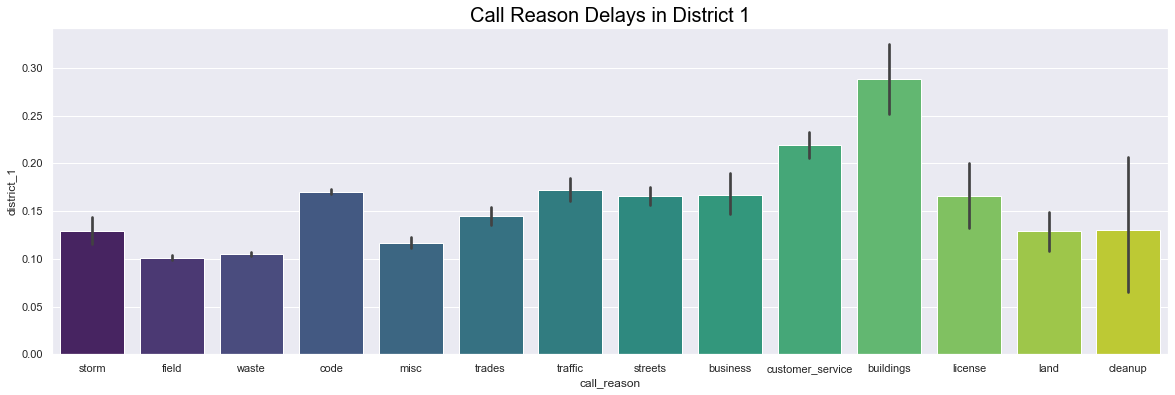

In [37]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', data=train,
               palette='viridis')

<AxesSubplot:title={'center':'Call Reason Delays in District 1'}, xlabel='call_reason', ylabel='district_1'>

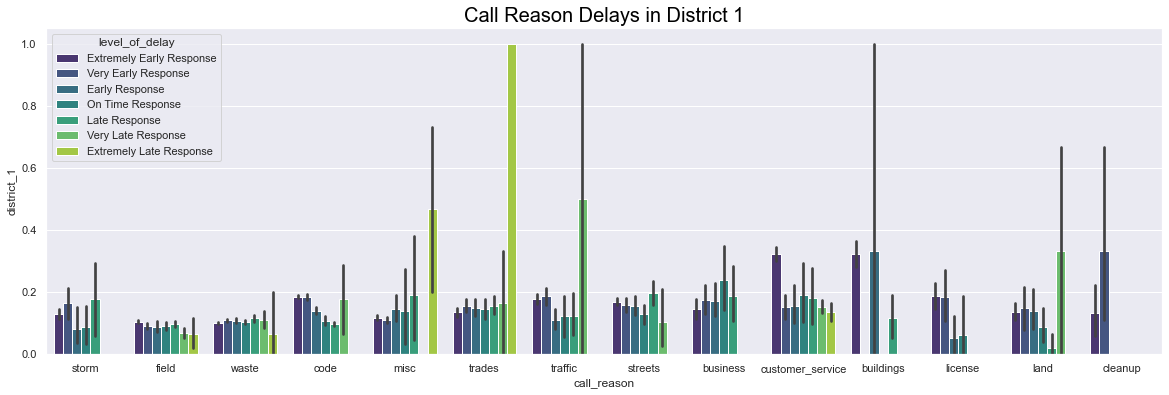

In [38]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 1
    - Pretty even distribution of call reasons
    - For once customer services arent high in late responses but rather have an overwhelming amount of on time responses.
    - Clean up calls tend to either be early or very late
    - for once cs isnt total trash

<AxesSubplot:title={'center':'Call Reason Delays in District 2'}, xlabel='call_reason', ylabel='district_2'>

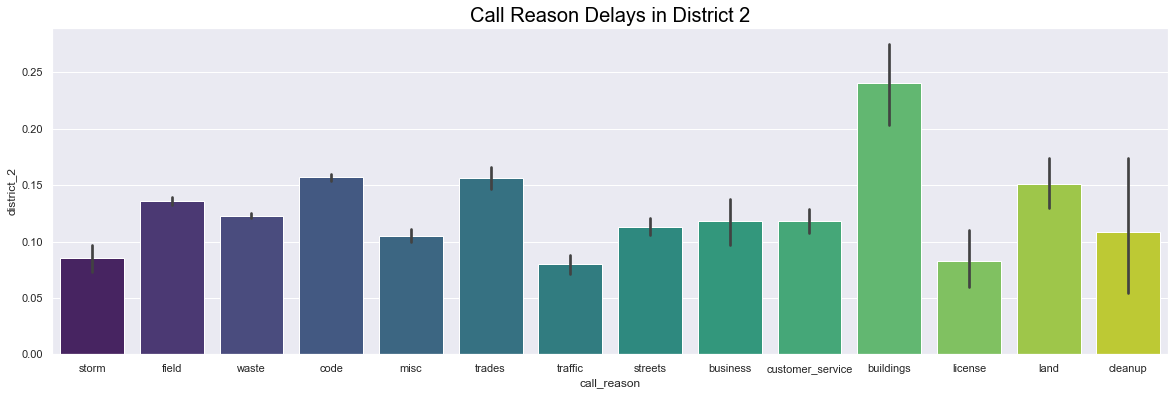

In [39]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', data=train,
               palette='viridis')

<AxesSubplot:title={'center':'Call Reason Delays in District 2'}, xlabel='call_reason', ylabel='district_2'>

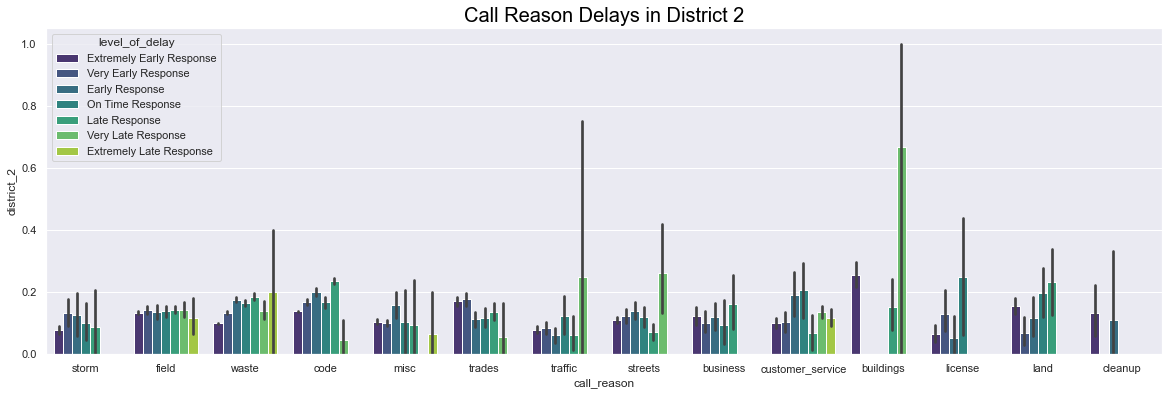

In [40]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 2
    - Traffic seems to be pretty neglected in district 2
        - holy extremely late responses batman
            - makes up for nearly 50% of all of the extremely late tradfic related calls made in SA

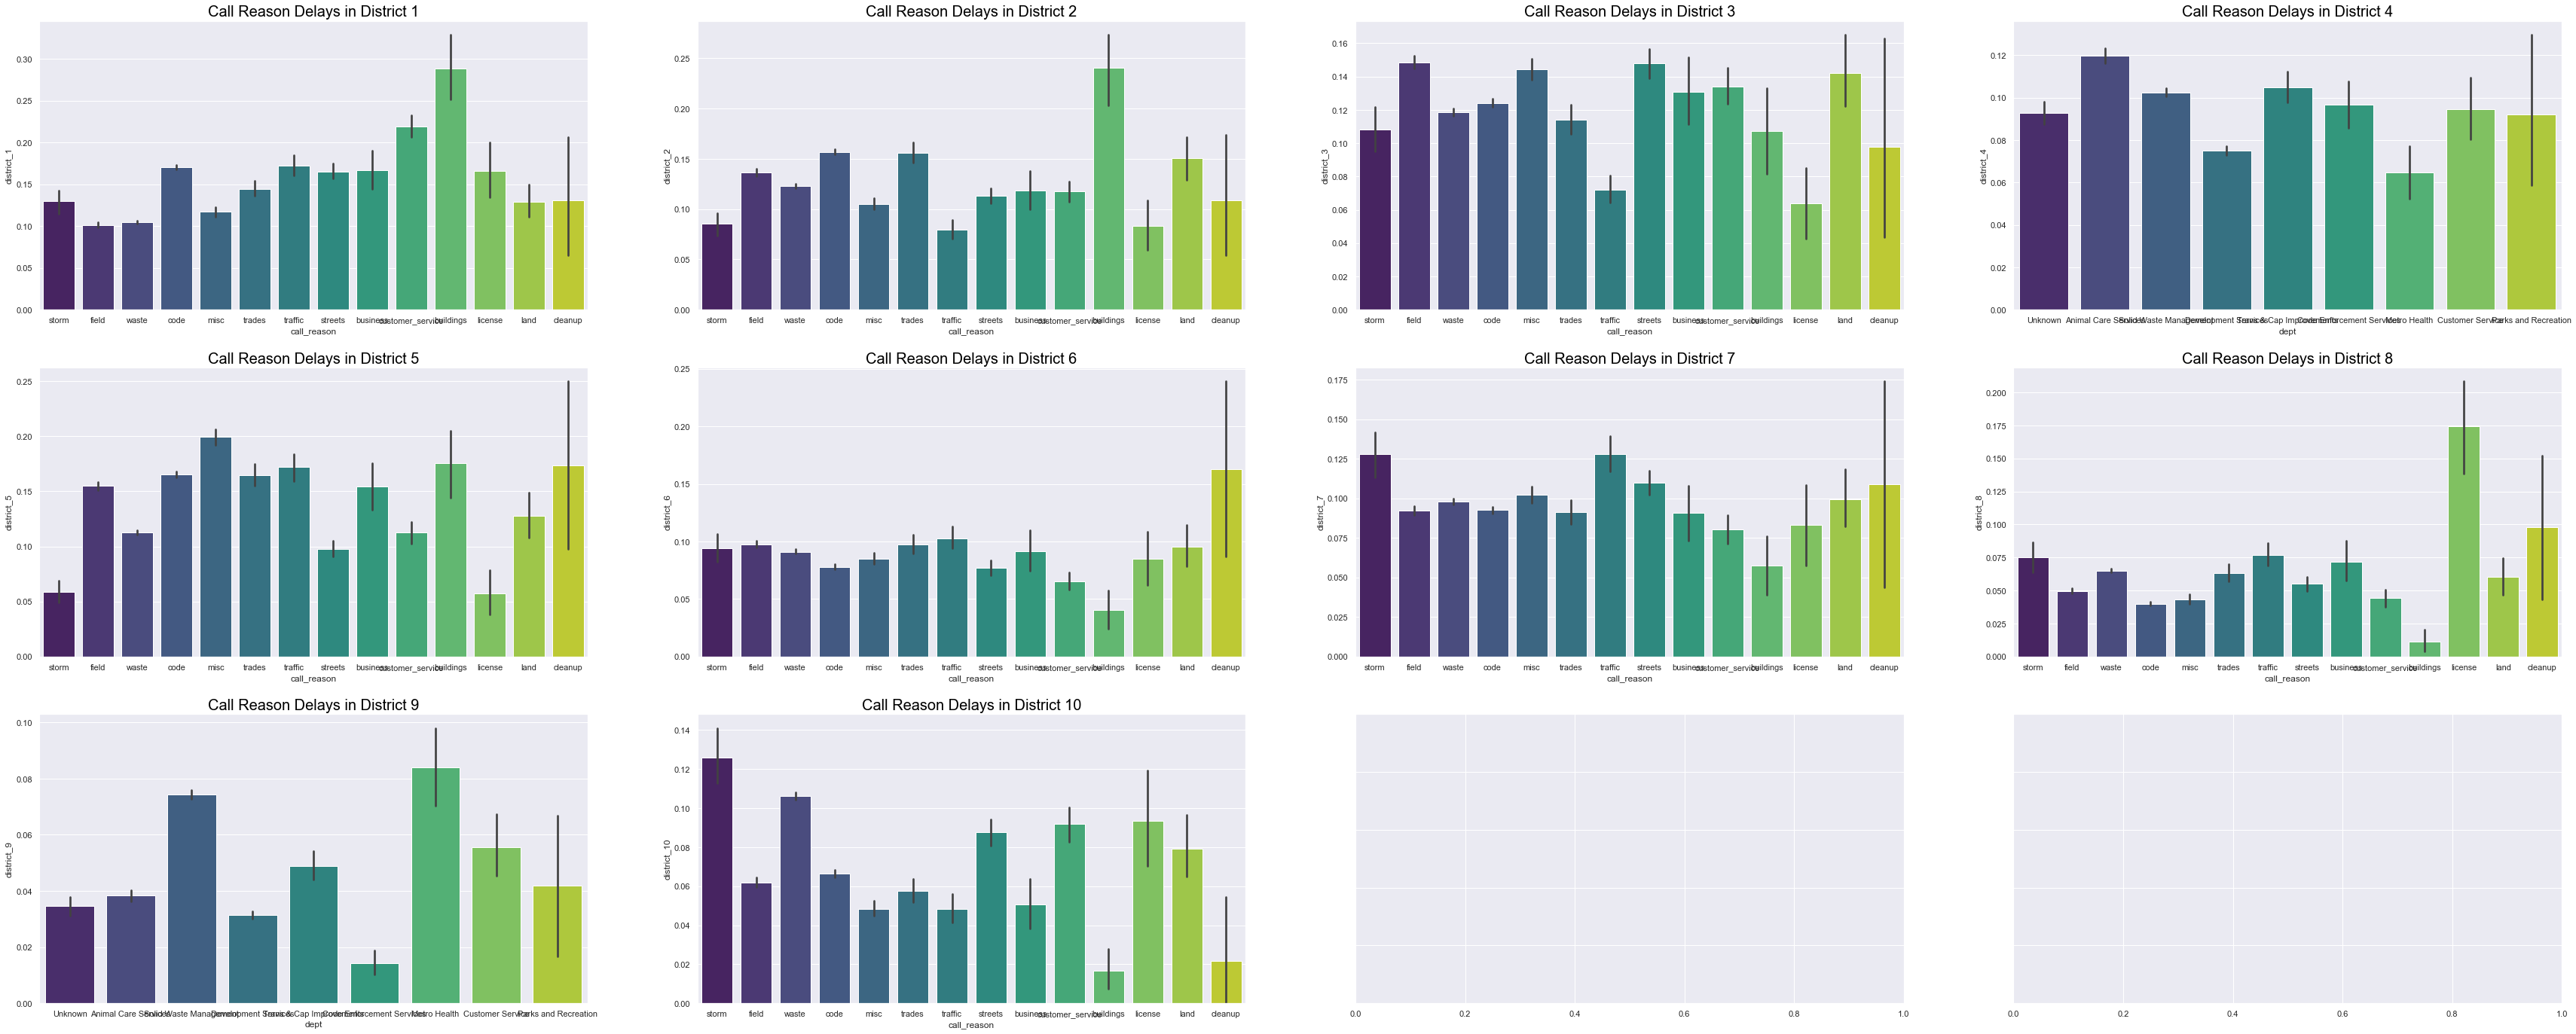

In [41]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,4,1)
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', data=train,
               palette='viridis')

plt.subplot(3,4,2)
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', data=train,
               palette='viridis')

plt.subplot(3,4,3)
plt.title("Call Reason Delays in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_3', data=train,
               palette='viridis')

plt.subplot(3,4,4)
plt.title("Call Reason Delays in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_4', data=train,
               palette='viridis')

plt.subplot(3,4,5)
plt.title("Call Reason Delays in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_5', data=train,
               palette='viridis')

plt.subplot(3,4,6)
plt.title("Call Reason Delays in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_6', data=train,
               palette='viridis')

plt.subplot(3,4,7)
plt.title("Call Reason Delays in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_7', data=train,
               palette='viridis')

plt.subplot(3,4,8)
plt.title("Call Reason Delays in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_8', data=train,
               palette='viridis')

plt.subplot(3,4,9)
plt.title("Call Reason Delays in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_9', data=train,
               palette='viridis')

plt.subplot(3,4,10)
plt.title("Call Reason Delays in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_10', data=train,
               palette='viridis')

plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399986 entries, 0 to 399985
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 399986 non-null  datetime64[ns]
 1   due_date                  399986 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   399986 non-null  object        
 4   dept                      399986 non-null  object        
 5   call_reason               399986 non-null  object        
 6   case_type                 399986 non-null  object        
 7   case_status               399986 non-null  object        
 8   source_id                 399986 non-null  object        
 9   address                   399986 non-null  object        
 10  council_district          399986 non-null  int64         
 11  longitude                 399986 non-null  float64       
 12  la

# Statistical Testing

## Council District

In [43]:
# normlaize makes it percentage
observe = pd.crosstab(train.council_district, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The district and the level of delay are independent from each other"
alt_hypothesis = "The district and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the hypothesis that: 
 The district and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The district and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Department

In [44]:
# normlaize makes it percentage
observe = pd.crosstab(train.dept, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The department hadling a call and the level of delay are independent from each other"
alt_hypothesis = "The department and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the null hypothesis that: 
 The department hadling a call and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The department and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Reason for Calling

In [45]:
# normlaize makes it percentage
observe = pd.crosstab(train.call_reason, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The reason for the call and the level of delay are independent from each other"
alt_hypothesis = "The reason for calling and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the hypothesis that: 
 The reason for the call and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The reason for calling and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Source ID

In [46]:
# normlaize makes it percentage
observe = pd.crosstab(train.source_id, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The source of the report and the level of delay are independent from each other"
alt_hypothesis = "The source and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the hypothesis that: 
 The source of the report and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The source and the delay are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Income Per Capita

In [47]:
# normlaize makes it percentage
observe = pd.crosstab(train.per_capita_income, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The income per capita and the level of delay are independent from each other"
alt_hypothesis = "The income per capita are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the null hypothesis that: 
 The income per capita and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The income per capita are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Voter turnout per district

In [48]:
# normlaize makes it percentage
observe = pd.crosstab(train.voter_turnout_2019, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The voter turnout per district and the level of delay are independent from each other"
alt_hypothesis = "The voter turnout per district are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


I reject the null hypothesis that: 
 The voter turnout per district and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The voter turnout per district are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


___

## Month open

In [49]:
# normlaize makes it percentage
observe = pd.crosstab(train.open_month, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The month a case was open and the level of delay are independent from each other"
alt_hypothesis = "The month a case was open amd delay level are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

I reject the null hypothesis that: 
 The month a case was open and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The month a case was open amd delay level are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


## week open

In [50]:
# normlaize makes it percentage
observe = pd.crosstab(train.open_week, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The week a case was open and the level of delay are independent from each other"
alt_hypothesis = "The week a case was open amd delay level are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

I reject the null hypothesis that: 
 The week a case was open and the level of delay are independent from each other
 
I move forward with my alternative hypothesis that 
 The week a case was open amd delay level are dependent from one another.
 
The alpha is: 
 0.05
 
P Value is: 
 0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399986 entries, 0 to 399985
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 399986 non-null  datetime64[ns]
 1   due_date                  399986 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   399986 non-null  object        
 4   dept                      399986 non-null  object        
 5   call_reason               399986 non-null  object        
 6   case_type                 399986 non-null  object        
 7   case_status               399986 non-null  object        
 8   source_id                 399986 non-null  object        
 9   address                   399986 non-null  object        
 10  council_district          399986 non-null  int64         
 11  longitude                 399986 non-null  float64       
 12  la